In [128]:
import pandas as pd
import numpy as np
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib.finance as mpf

%matplotlib inline

In [102]:
stock_data = ts.get_k_data('600848',start='2017-01-01')

In [103]:
# 设定转换的周期，W周，M月，Q季度，5min 5分钟，12D 12天
period_type = 'W'

In [104]:
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data.set_index('date', inplace=True)

In [105]:
# 将所有的数据先设置成周期的最后一个
period_stock_data = stock_data.resample(period_type).last()

# open
period_stock_data['open'] = stock_data['open'].resample(period_type).first()
# high
period_stock_data['high'] = stock_data['high'].resample(period_type).max()
# low
period_stock_data['low'] = stock_data['low'].resample(period_type).min()
# volumn. sum
period_stock_data['volume'] = stock_data['volume'].resample(period_type).sum()
# test。没搞明白怎么用
#period_stock_data['test'] = stock_data['low'].resample(period_type).apply(lambda x : x )

In [106]:
# 处理Nan数据
# 一般做法：
period_stock_data = period_stock_data[period_stock_data['code'].notnull()]
period_stock_data.reset_index(inplace=True)
# 与NaN有关的函数：
# period_stock_data[period_stock_data['code'].isna()] #判断哪个是na。跟.isin()类似的用法
# period_stock_data.dropna() #删掉所有的NaN行
# period_stock_data.fillna(value=5) #填充NaN的项。此例用5

In [118]:
# 将时间转换成matplotlib的库可以识别的数字格式
# 导入两个涉及的库
from matplotlib.pylab import date2num
import datetime

def date_to_num(dates):
    num_time = []
    for date in dates:
        #date_time = datetime.datetime.strptime(date,'%Y-%m-%d')
        num_date = date2num(date)
        num_time.append(num_date)
    return num_time

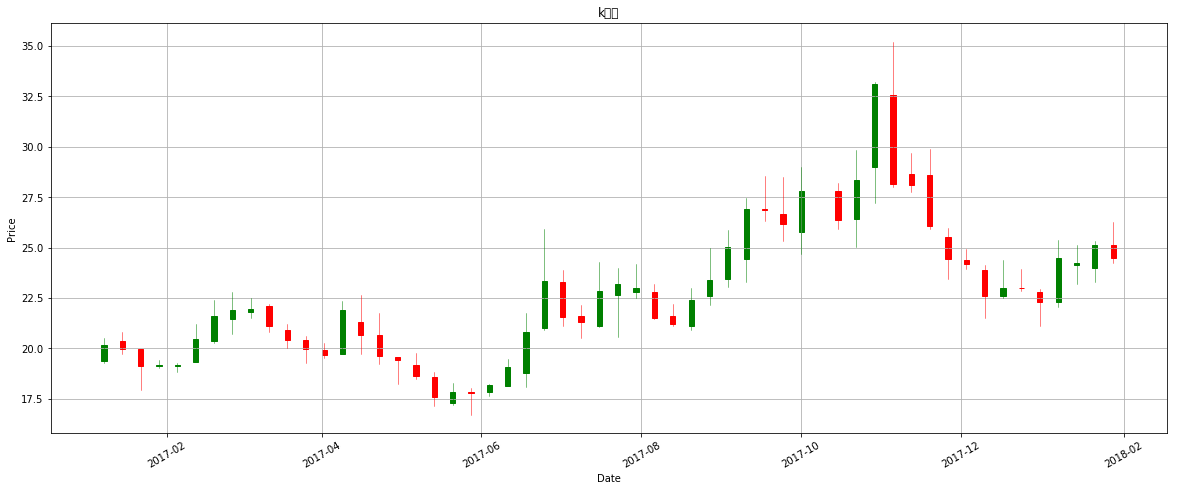

In [134]:
# 画k线图
# 将dataframe转换成matrix, 转换成matplotlib可以识别的格式
orig_stock_data = period_stock_data
mat_stock_data = orig_stock_data.as_matrix()
num_time = date_to_num(mat_stock_data[:,0])
mat_stock_data[:,0] = num_time
# 开始画图
# 数据列的顺序,从左至右是,开盘,收盘,最高,最低,成交量
# matplotlib.finance中有两个函数,一个是candlestick_ochl(),刚好对应上边的顺序
# 另一个是candlestick_ohlc(),对应的是开盘,最高,最低,收盘的数据格式
fig, ax = plt.subplots(figsize=(20,15))
fig.subplots_adjust(bottom=0.5)
mpf.candlestick_ochl(ax, mat_stock_data, width=2.0, colorup='g', colordown='r', alpha=1.0)
plt.grid(True)
# 设置日期刻度旋转的角度 
plt.xticks(rotation=30)
plt.title(u'k线图')
plt.xlabel('Date')
plt.ylabel('Price')
# x轴的刻度为日期
ax.xaxis_date()
###candlestick_ochl()函数的参数
# ax 绘图Axes的实例
# mat_wdyx 价格历史数据
# width    图像中红绿矩形的宽度,代表天数
# colorup  收盘价格大于开盘价格时的颜色
# colordown   低于开盘价格时矩形的颜色
# alpha      矩形的颜色的透明度

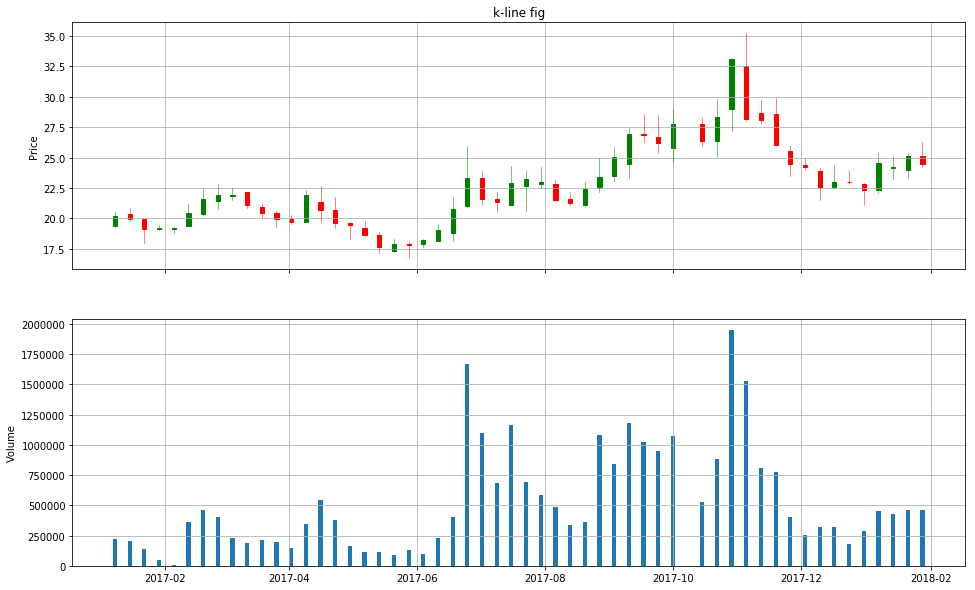

In [139]:
# k线图和成交量(柱状图)的组合图表
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(16,10))
mpf.candlestick_ochl(ax1, mat_stock_data, width=2, colorup='g', colordown='r', alpha=1.0)
ax1.set_title('k-line fig')
ax1.set_ylabel('Price')
ax1.grid(True)
ax1.xaxis_date()
plt.bar(mat_stock_data[:,0], mat_stock_data[:,5], width=2)
ax2.set_ylabel('Volume')
ax2.grid(True)